## 📘 Step 1: Importing the Essentials

Before we get into the data, let’s bring in all the libraries that will help us throughout this project — from reading and analyzing data to building and evaluating the machine learning model.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set(style="whitegrid")


## 📥 Step 2: Load and Inspect the Data
Let's load the dataset and take a peek at the first few entries. This dataset contains numeric features computed from digitized images of breast mass samples.

In [43]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 📊 Step 3: Basic Data Exploration
We check for missing values and get an overview of the data distribution to make sure everything looks consistent and ready for processing.



In [44]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 🧹 Step 4: Data Cleaning & Preprocessing
We clean the data by dropping irrelevant identifiers, encode our target variable for modeling, and scale features so that the model isn't biased toward large-valued features.

In [45]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔬 Step 5: Exploratory Data Analysis (EDA)
We use a heatmap to understand feature relationships, a bar chart to visualize class imbalance, and boxplots to see how key features differ between benign and malignant tumors.

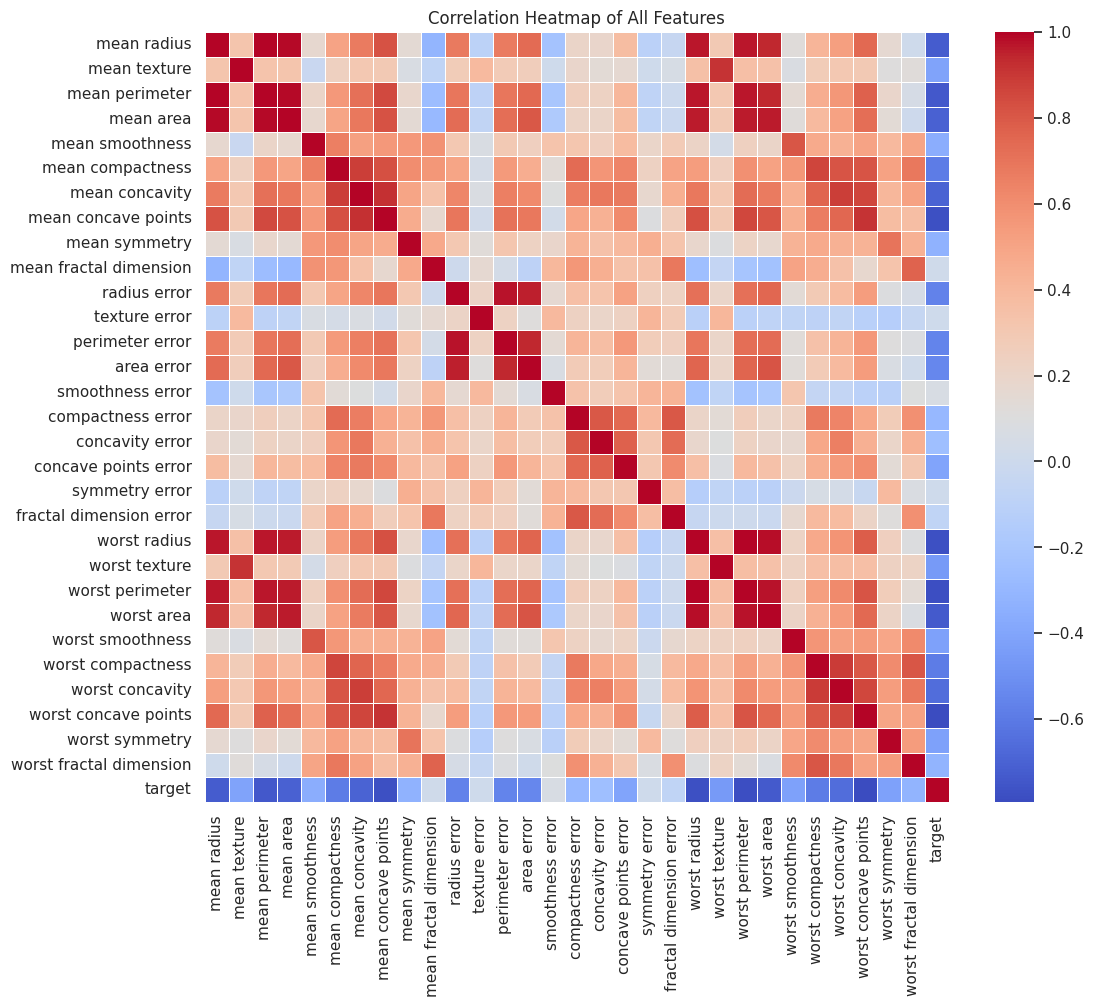

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()


/tmp/ipython-input-54-2563376106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


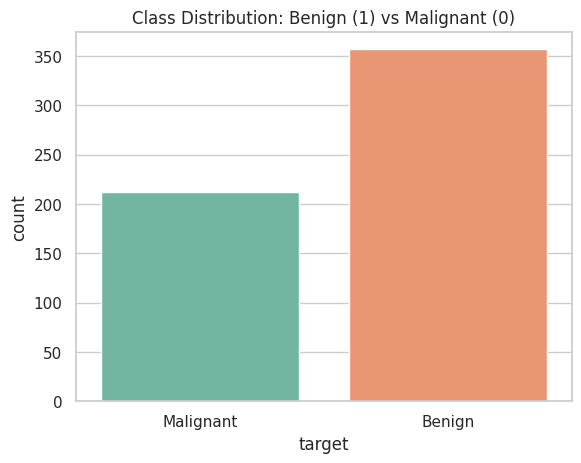

In [54]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Class Distribution: Benign (1) vs Malignant (0)")
plt.xticks([0,1], ['Malignant', 'Benign'])
plt.show()


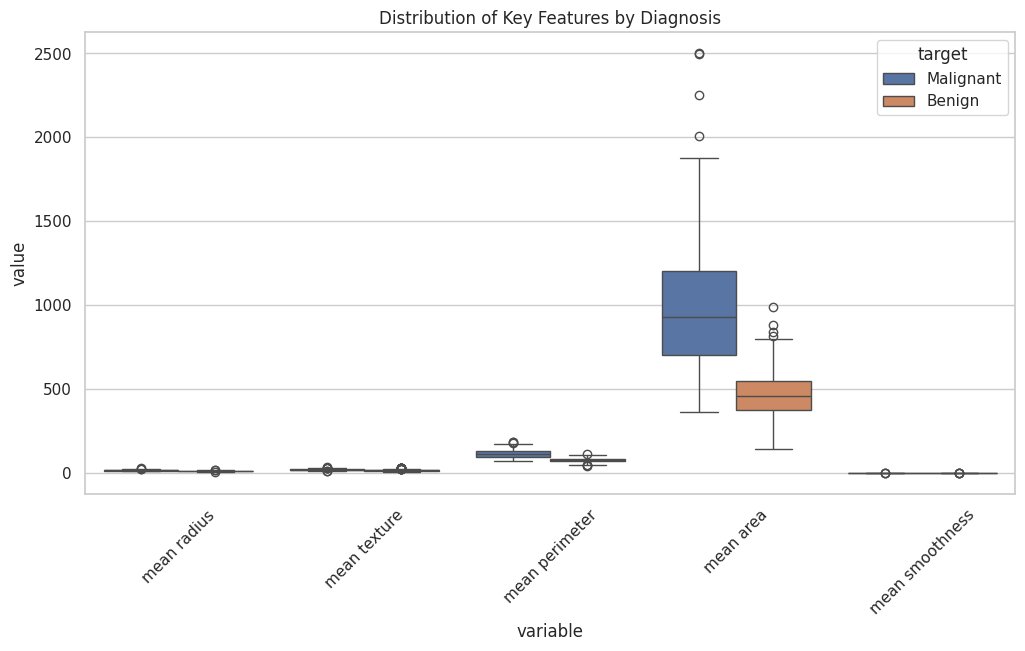

In [55]:
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df_temp = df.copy()
df_temp['target'] = df_temp['target'].map({0: 'Malignant', 1: 'Benign'})
df_melt = pd.melt(df_temp, id_vars='target', value_vars=key_features)

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='target', data=df_melt)
plt.title("Distribution of Key Features by Diagnosis")
plt.xticks(rotation=45)
plt.show()


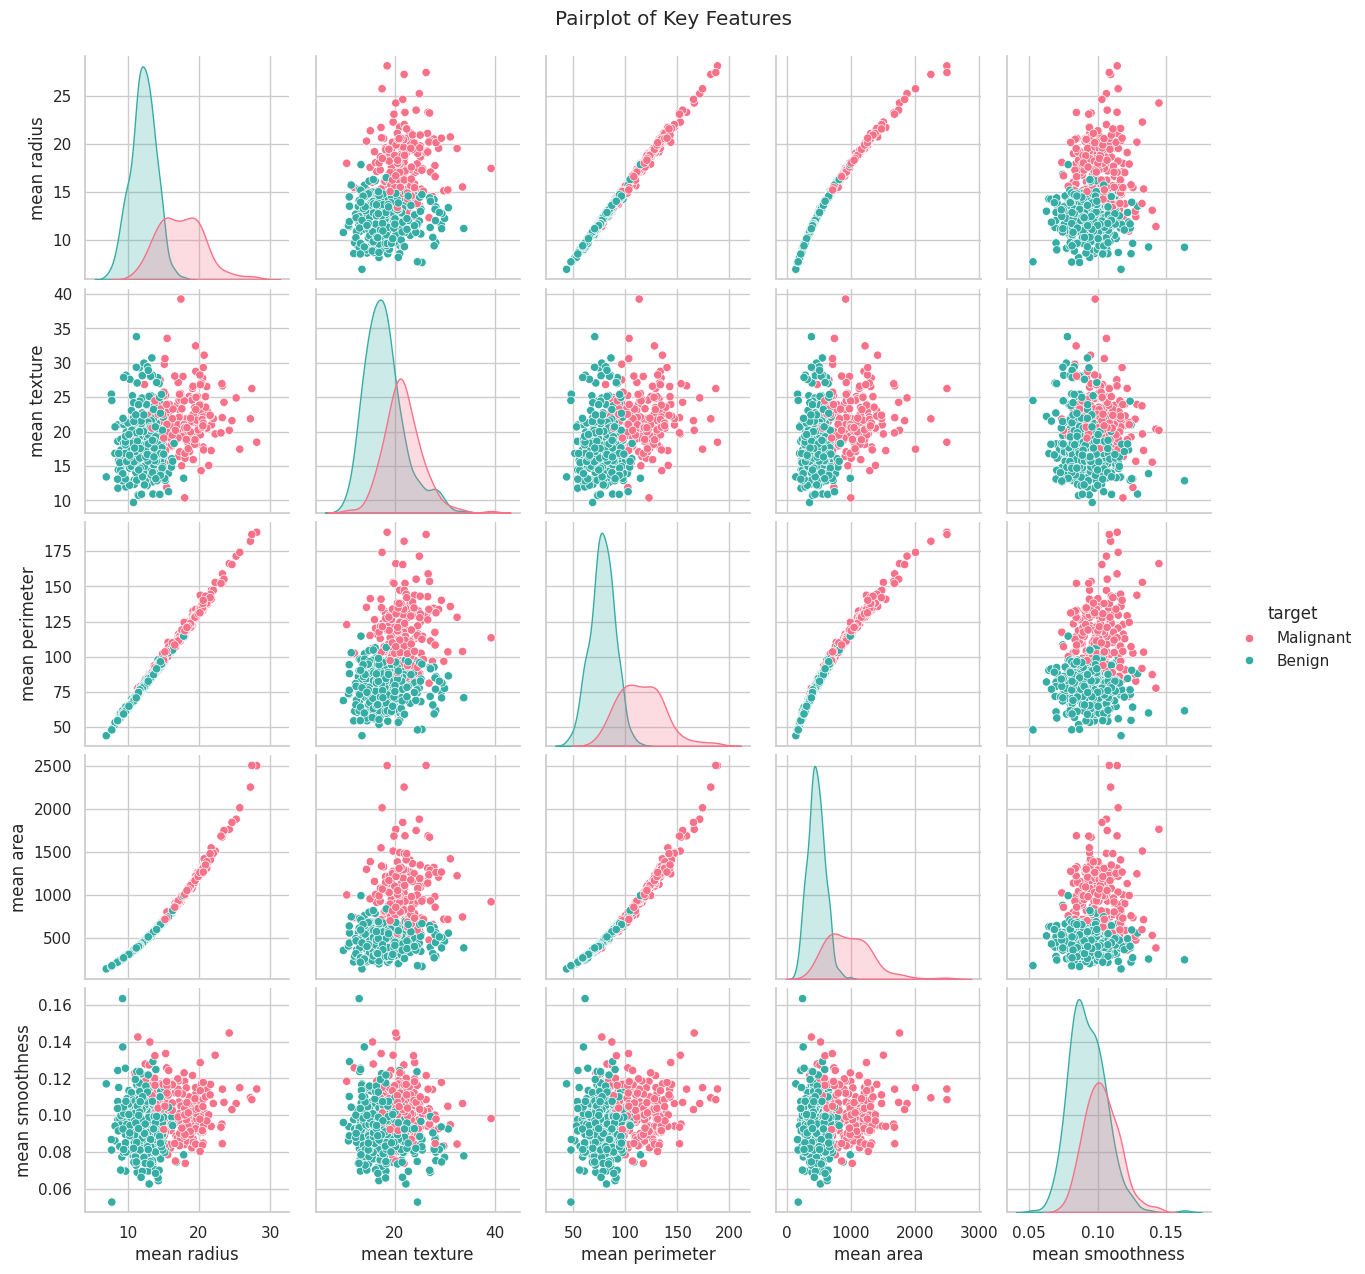

In [56]:
sns.pairplot(df_temp, vars=key_features, hue='target', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


## ✂️ Step 6: Train-Test Split
We split the data into training and testing sets to evaluate the model’s generalization on unseen data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## 🤖 Step 7: Model Training
A Random Forest classifier is trained — it's a powerful ensemble model known for robustness and accuracy.

In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 🧪 Step 8: Evaluation
We assess model performance using accuracy, precision, recall, F1-score, and a confusion matrix — all important metrics in a medical diagnosis context.

In [48]:
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



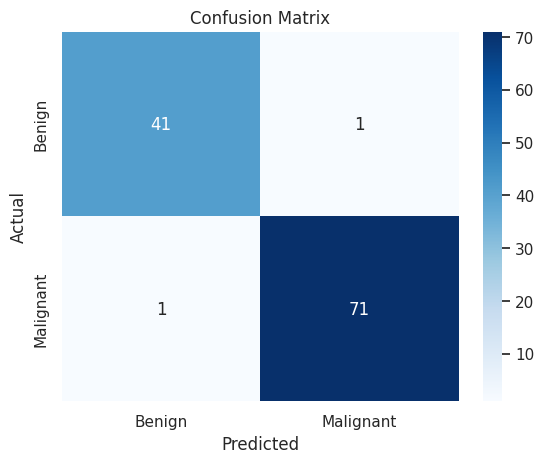

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


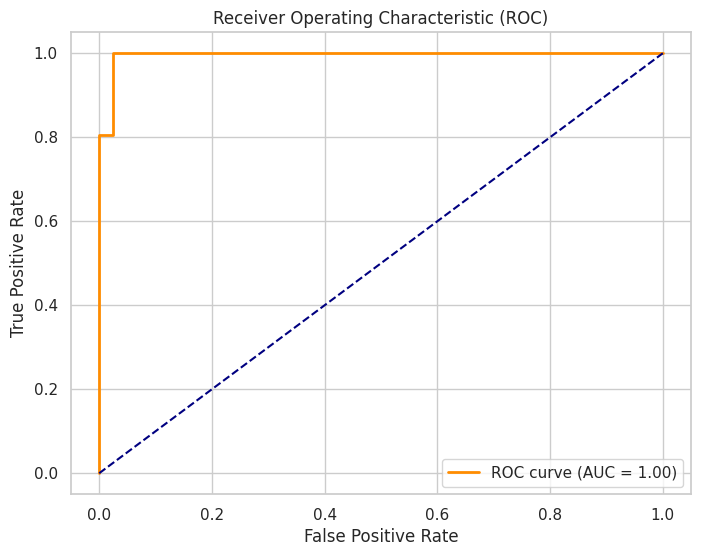

In [57]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


## 💾 Step 9: Save the Model and Scaler
The trained model and scaler are saved so they can be reused later in a web app or other prediction pipeline.

In [50]:
joblib.dump(model, 'logreg_breast_cancer_model.pkl')
joblib.dump(scaler, 'logreg_breast_cancer_scaler.pkl')


['logreg_breast_cancer_scaler.pkl']

## 📈 Step 10: Feature Importance
Understanding feature importance helps explain the model’s behavior and gives insight into which features most influence the prediction.

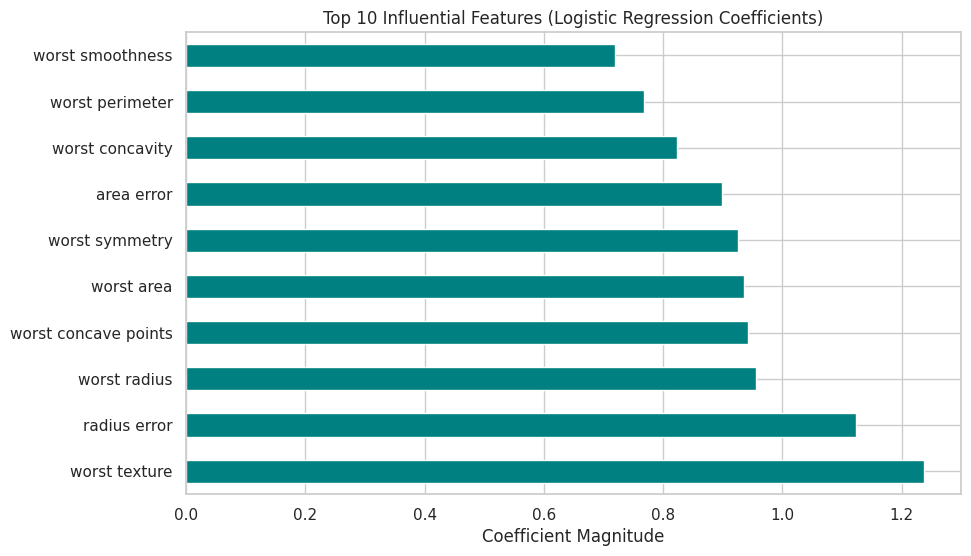

In [58]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(10)

top_features.plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Top 10 Influential Features (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.show()
